<a href="https://colab.research.google.com/github/Thrishankkuntimaddi/Data-Structures-and-Algorithms-Advanced/blob/main/22%20-%20Segment%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    - used for fixed sized arrays and following two types of operations
      a. Range Query : O(log n)
      b. Update a value : O(log n)

    - Require Θ(n) preprocessing time and Θ(n) Space complexity

------------------

    I/P : arr = [10, 20, 30, 40, 50]

      getSum(0, 2) # 60

      getSum(1, 3) # 90

      update(1, 60)

      getSum(0, 2) # 100

In [1]:
# Method 1

class SegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree = [0] * (4 * self.n)
        self.build(arr, 0, 0, self.n - 1)

    def build(self, arr, node, start, end):
        if start == end:
            self.tree[node] = arr[start]
        else:
            mid = (start + end) // 2
            self.build(arr, 2 * node + 1, start, mid)
            self.build(arr, 2 * node + 2, mid + 1, end)
            self.tree[node] = self.tree[2 * node + 1] + self.tree[2 * node + 2]

    def get_sum(self, qs, qe):
        return self._get_sum(0, 0, self.n - 1, qs, qe)

    def _get_sum(self, node, start, end, qs, qe):
        if qs > end or qe < start:
            return 0
        if qs <= start and qe >= end:
            return self.tree[node]
        mid = (start + end) // 2
        left_sum = self._get_sum(2 * node + 1, start, mid, qs, qe)
        right_sum = self._get_sum(2 * node + 2, mid + 1, end, qs, qe)
        return left_sum + right_sum

    def update(self, i, new_val):
        self._update(0, 0, self.n - 1, i, new_val)

    def _update(self, node, start, end, i, new_val):
        if start == end:
            self.tree[node] = new_val
        else:
            mid = (start + end) // 2
            if start <= i <= mid:
                self._update(2 * node + 1, start, mid, i, new_val)
            else:
                self._update(2 * node + 2, mid + 1, end, i, new_val)
            self.tree[node] = self.tree[2 * node + 1] + self.tree[2 * node + 2]

def main():
    arr = [1, 3, 5, 7, 9, 11]
    segment_tree = SegmentTree(arr)

    print("Sum of values in range (1, 3):", segment_tree.get_sum(1, 3))
    segment_tree.update(1, 10)
    print("Sum of values in range (1, 3) after update:", segment_tree.get_sum(1, 3))

main()

# Time Complexity : Θ(qe - qs + 1)
# Space Complexity : O(1)

Sum of values in range (1, 3): 15
Sum of values in range (1, 3) after update: 22


# Motivation for using Segment Tree

x/4 -> queries of one type : O(n)

3x/4 -> queries of other type : O(1)

Avg Time : (x/4 * O(n) + 3x/4 * O(1))/x = O(n)

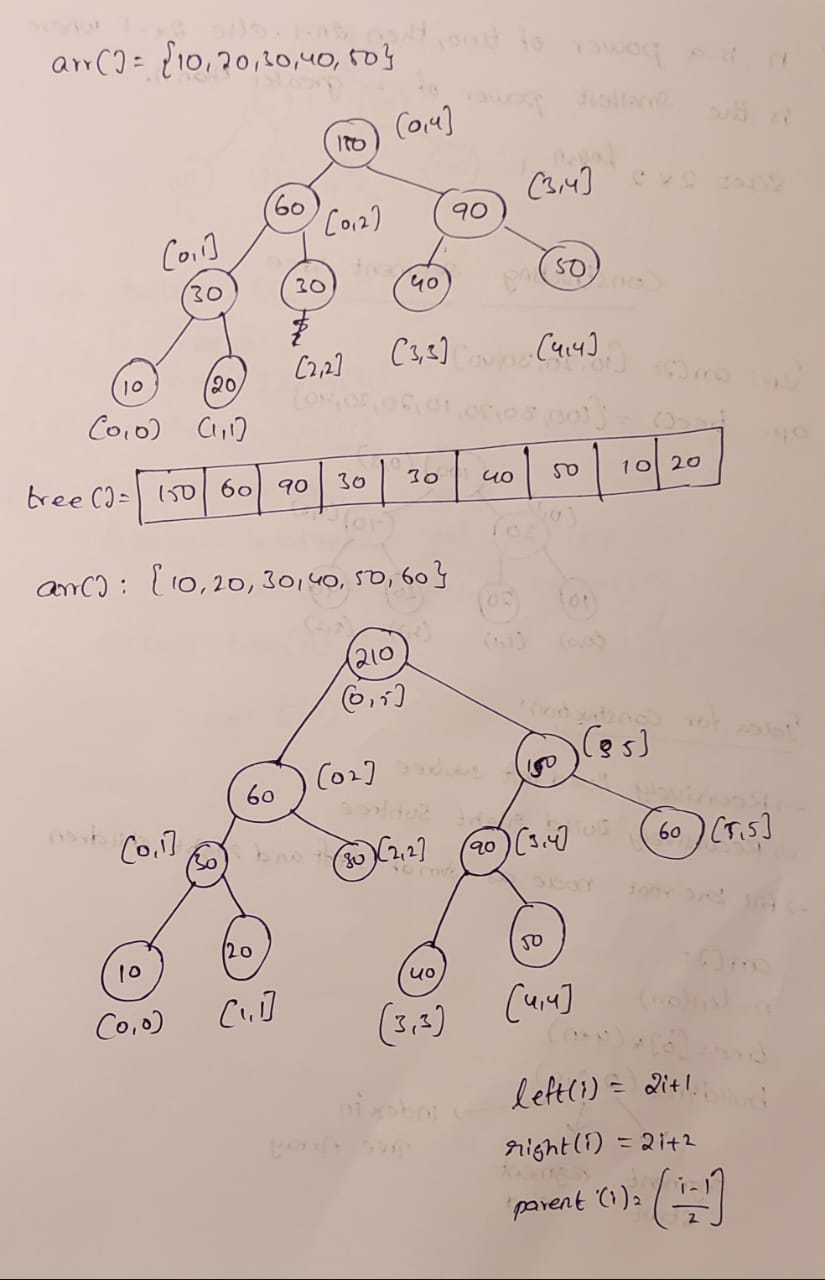

      If n is a power of two, then 2n-1 else 2x-1 where x is the smallest power of 2 greater than n.

      size = 2 * 2^logn - 1

# Constructing Segment Tree

I/P : arr = [10, 20, 30, 40]

O/P : tree = [100, 30, 70, 10, 20, 30, 40]

### Idea for Construction

-> Recursively Build left subtree

-> Recursively Build right subtree

-> Fill the root node as sum of left and right children

ss : segment start

se : segment end

si : index in Tree Array


In [3]:
# Implementation

arr = [10, 20, 30, 40]
n = len(arr)
tree = [0] * (4 * n)

def buildTree(ss, se, si):
    if ss == se:
        tree[si] = arr[ss]
        return arr[ss]

    mid = (ss + se) // 2
    tree[si] = buildTree(ss, mid, 2 * si + 1) + buildTree(mid + 1, se, 2 * si + 2)
    return tree[si]

buildTree(0, n-1, 0)
print("Segment Tree:", tree)

# Time Complexity : θ(n)

Segment Tree: [100, 30, 70, 10, 20, 30, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Range Query on segment Tree

I/P : arr = [10, 20, 30, 40]; getSum(0, 2)

O/P : 60

In [4]:
# Implementation

arr = [10, 20, 30, 40]
n = len(arr)
tree = [0] * (4 * n)

def buildTree(ss, se, si):
    if ss == se:
        tree[si] = arr[ss]
        return arr[ss]

    mid = (ss + se) // 2
    tree[si] = buildTree(ss, mid, 2 * si + 1) + buildTree(mid + 1, se, 2 * si + 2)
    return tree[si]

def getsumRec(qs, qe, ss, se, si):
    if se < qs or ss > qe:
        return 0

    if qs <= ss and qe >= se:
        return tree[si]

    mid = (ss + se) // 2
    return getsumRec(qs, qe, ss, mid, 2 * si + 1) + getsumRec(qs, qe, mid + 1, se, 2 * si + 2)

def getSum(qs, qe):
    if qs < 0 or qe > n - 1 or qs > qe:
        print("Invalid input")
        return -1

    return getsumRec(qs, qe, 0, n - 1, 0)

buildTree(0, n - 1, 0)
print("Segment Tree:", tree)
print("Sum of range [0, 2]:", getSum(0, 2))
print("Sum of range [1, 3]:", getSum(1, 3))

# Time Complexity : O(logn)

Segment Tree: [100, 30, 70, 10, 20, 30, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sum of range [0, 2]: 60
Sum of range [1, 3]: 90


# Update Query

Idea :

-> Find the difference between odd and new values

-> Update all the nodes having given node in range

-> we write a recursive function

In [5]:
# Implementation

arr = [10, 20, 30, 40]
n = len(arr)
tree = [0] * (4 * n)

def buildTree(ss, se, si):
    if ss == se:
        tree[si] = arr[ss]
        return arr[ss]

    mid = (ss + se) // 2
    tree[si] = buildTree(ss, mid, 2 * si + 1) + buildTree(mid + 1, se, 2 * si + 2)
    return tree[si]

def getsumRec(qs, qe, ss, se, si):
    if se < qs or ss > qe:
        return 0

    if qs <= ss and qe >= se:
        return tree[si]

    mid = (ss + se) // 2
    return getsumRec(qs, qe, ss, mid, 2 * si + 1) + getsumRec(qs, qe, mid + 1, se, 2 * si + 2)

def getSum(qs, qe):
    if qs < 0 or qe > n - 1 or qs > qe:
        print("Invalid input")
        return -1
    return getsumRec(qs, qe, 0, n - 1, 0)

def update(ss, se, i, si, diff):
    if i < ss or i > se:
        return

    tree[si] += diff

    if se > ss:
        mid = (ss + se) // 2
        update(ss, mid, i, 2 * si + 1, diff)
        update(mid + 1, se, i, 2 * si + 2, diff)

def updateValue(i, new_val):
    if i < 0 or i > n - 1:
        print("Invalid input")
        return

    diff = new_val - arr[i]

    arr[i] = new_val

    update(0, n - 1, i, 0, diff)

buildTree(0, n - 1, 0)
print("Initial Segment Tree:", tree)
print("Sum of range [0, 2]:", getSum(0, 2))

updateValue(1, 25)
print("Updated Segment Tree:", tree)
print("Sum of range [0, 2]:", getSum(0, 2))

Initial Segment Tree: [100, 30, 70, 10, 20, 30, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sum of range [0, 2]: 60
Updated Segment Tree: [105, 35, 70, 10, 25, 30, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sum of range [0, 2]: 65
